In [1]:
import js

# Access the navigator object to get browser information
user_agent = js.navigator.userAgent
platform = js.navigator.platform
language = js.navigator.language

# Print browser information
print("User Agent:", user_agent)
print()
print("Platform:", platform)
print()
print("Language:", language)
print()




User Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36

Platform: Win32

Language: en-US



In [2]:
import piplite
await piplite.install("intermat")
await piplite.install("ase")
await piplite.install("plotly")

### Quick interface generator given two atomic structures in POSCAR format

In [3]:
# Conventional cells
poscar_1= """JVASP1002
1.0
5.49363 0.0 0.0
-0.0 5.49363 0.0
0.0 0.0 5.49363
Si
8
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si
"""

poscar_2 = """JVASP-1174
1.0
5.73163 0.0 0.0
-0.0 5.73163 0.0
0.0 0.0 5.73163
Ga As
4 4
direct
0.0 0.0 0.0 Ga
0.0 0.5 0.5 Ga
0.5 0.0 0.5 Ga
0.5 0.5 0.0 Ga
0.25 0.75 0.75 As
0.25 0.25 0.25 As
0.75 0.75 0.25 As
0.75 0.25 0.75 As
"""


In [4]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_2).atoms

x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.0,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    ltol=0.08,
    
)

structs = x.generate()
heterostructure_atoms=Atoms.from_dict(structs[0]['generated_interface'])
film_atoms=Atoms.from_dict(structs[0]['film_surf'])
surf_atoms=Atoms.from_dict(structs[0]['subs_surf'])


No module named 'spglib'
Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


/lib/python3.12/site-packages/jarvis/db/figshare.py:515: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  progress_bar = tqdm(
100%|██████████| 40.8M/40.8M [00:00<00:00, 48.6MiB/s]


Loading the zipfile...
Loading completed.


In [5]:
print(heterostructure_atoms)

System
1.0
-0.0 5.73163 -0.0
8.10575 -0.0 -0.0
-0.0 -0.0 -26.343643666455268
As Ga Si 
12 12 24 
direct
0.125 -0.7499998964165412 0.8511499074085056 bottom
0.125 -0.24999996547218029 0.6973034974115482 bottom
0.125 0.24999996547218029 0.5434570874145908 bottom
-0.375 -0.4999999309443608 0.9280731124069845 bottom
-0.375 -1.156482317317872e-17 0.7742267024100269 bottom
-0.375 0.4999999309443607 0.6203802924130692 bottom
-0.375 -0.9999998618887216 0.9280731124069845 bottom
-0.375 -0.4999999309443608 0.7742267024100269 bottom
-0.375 -1.156482317317872e-17 0.6203802924130692 bottom
0.125 -0.2499999654721805 0.8511499074085056 bottom
0.125 0.2499999654721804 0.6973034974115482 bottom
0.125 0.7499998964165413 0.5434570874145908 bottom
0.375 0.9999998618887216 0.5434570874145908 bottom
0.375 -1.156482317317872e-17 0.6973034974115484 bottom
0.375 0.4999999309443607 0.5434570874145908 bottom
-0.125 -0.24999996547218029 0.9280731124069845 bottom
-0.125 0.24999996547218029 0.7742267024100269 botto

(0.0, 8.649890812500004, 0.0, 27.660825849778032)

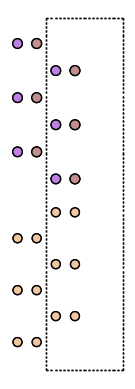

In [6]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
%matplotlib inline
plot_atoms(heterostructure_atoms.ase_converter(),  radii=0.3, rotation=('90x,90y,0z'))
plt.axis('off')


### Additional xy-/gamma-plane scan with Ewald sum

In [27]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_2).atoms

# disp_intvl = 0.1 for xy-plane scan
x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.1,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    ltol=0.08,
    
)

structs = x.generate()
wads = x.calculate_wad(method='ewald')
# heterostructure_atoms=Atoms.from_dict(structs[0]['generated_interface'])
# film_atoms=Atoms.from_dict(structs[0]['film_surf'])
# surf_atoms=Atoms.from_dict(structs[0]['subs_surf'])


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
len generated 100


100%|██████████| 100/100 [00:26<00:00,  3.83it/s]


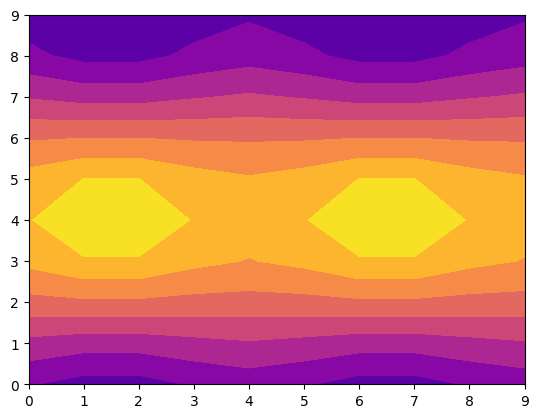

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = x.X
Y = x.Y
wads = np.array(wads).reshape(len(X), len(Y))
wads = np.array(x.wads["wads"])
index = np.argmin(wads)
combined_atoms = Atoms.from_dict(
    x.generated_interfaces[index]["generated_interface"]
)
wads = np.array(wads).reshape(len(X), len(Y))
plt.contourf(wads,cmap='plasma')
